In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
import json
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
#import datetime
#import matplotlib.dates as mdate


In [2]:
# Import API key
from config import api_key

#Import Citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/homework.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [5]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
       
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | petukhovo
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | palenque
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | dubai
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | upernavik
Processing Record 

Processing Record 37 of Set 4 | constitucion
Processing Record 38 of Set 4 | straumen
Processing Record 39 of Set 4 | tautira
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | puerto escondido
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | belle fourche
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | malko tarnovo
Processing Record 48 of Set 4 | santa clara
Processing Record 49 of Set 4 | abu dhabi
Processing Record 50 of Set 4 | watrous
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | bosaso
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | mengcheng
Processing Record 8 of Set 5 | vostok
Processing Record 9 of Set 5 | alma
Proces

Processing Record 27 of Set 8 | ventanas
Processing Record 28 of Set 8 | mitchell
Processing Record 29 of Set 8 | belmonte
Processing Record 30 of Set 8 | sabya
Processing Record 31 of Set 8 | half moon bay
Processing Record 32 of Set 8 | pangoa
Processing Record 33 of Set 8 | lamar
Processing Record 34 of Set 8 | pangkalanbuun
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | petrivka
Processing Record 37 of Set 8 | green river
Processing Record 38 of Set 8 | zhuhai
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | dunbar
Processing Record 42 of Set 8 | puri
Processing Record 43 of Set 8 | zhanakorgan
Processing Record 44 of Set 8 | chagda
City not found. Skipping...
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 8 | talcahuano
Processing Record 47 of Set 8 | wuda
Processing Record 48 of Set 8 | banda aceh
Processing Record 49 of Set 8 | sobolevo
Processi

Processing Record 18 of Set 12 | temaraia
City not found. Skipping...
Processing Record 19 of Set 12 | falealupo
City not found. Skipping...
Processing Record 20 of Set 12 | rocha
Processing Record 21 of Set 12 | sao gabriel da cachoeira
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 25 of Set 12 | mehamn
Processing Record 26 of Set 12 | wanning
Processing Record 27 of Set 12 | manta
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | coquimbo
Processing Record 30 of Set 12 | krasnoyarsk-66
City not found. Skipping...
Processing Record 31 of Set 12 | rio verde de mato grosso
Processing Record 32 of Set 12 | asfi
Processing Record 33 of Set 12 | batagay-alyta
Processing Record 34 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 35 of Set 12 | batagay
Processing Record 36 of Set 12 | phalaborwa
Processing Record

In [7]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": long,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [69]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1595085672,66,-24.87,113.63,55.40,12.75
1,George Town,40,MY,1595085613,94,5.41,100.34,78.80,4.70
2,Hilo,90,US,1595085673,88,19.73,-155.09,72.00,5.82
3,Petukhovo,80,RU,1595085673,58,55.07,67.90,81.54,3.27
4,Hobart,24,AU,1595085447,66,-42.88,147.33,50.00,13.87


In [71]:
weather_df.to_csv("output_data/weather.csv", index=False, header=True)

# First Requirements

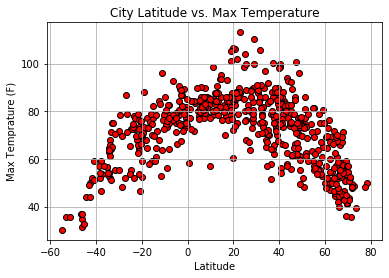

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "red", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("output_data/temperature.png")
plt.show()

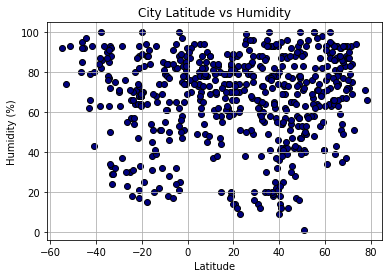

In [17]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.savefig("output_data/humidity.png")
plt.show()

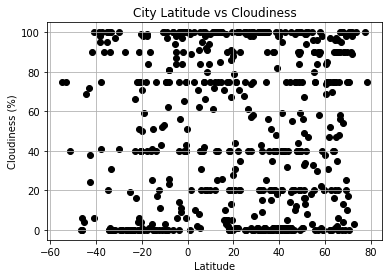

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "black", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.savefig("output_data/cloudiness.png")
plt.show()

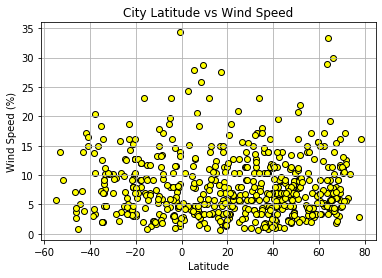

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "yellow", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("output_data/windspeed.png")
plt.show()

In [24]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [65]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = "o", facecolor = "yellow", edgecolor="black")
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.68


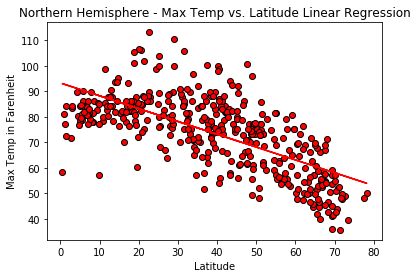

In [38]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp in Farenheit")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.77


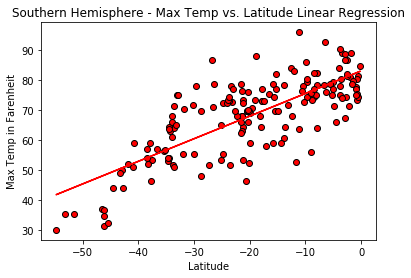

In [55]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp in Farenheit")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Based on the analysis and using Pearson's Correlation Coefficient, there is a strong correlation between temperature and latitude. 

The r-squared is : 0.06


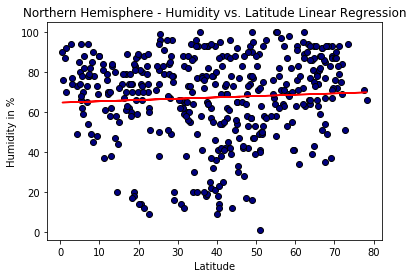

In [58]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity in %")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-squared is : -0.13


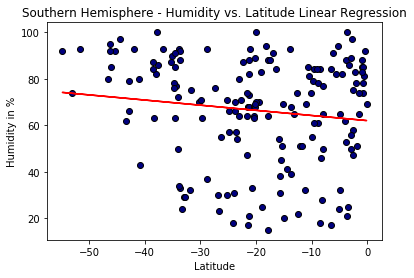

In [60]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity in %")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

Based on the analysis and using Pearson's Correlation Coefficient, there is a weak correlation between humidity and latitude.

The r-squared is : 0.0


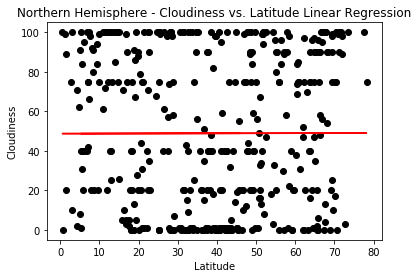

In [62]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-squared is : 0.15


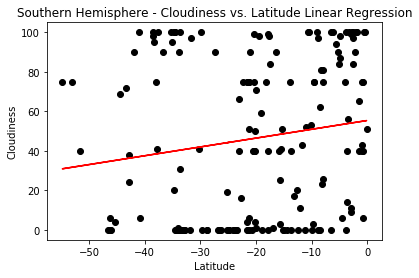

In [64]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

Based on the analysis and using Pearson's Correlation Coefficient, there is a weak correlation between cloudiness and latitude. In fact, in the nothern hemisphere, there is no correlation. 

The r-squared is : 0.02


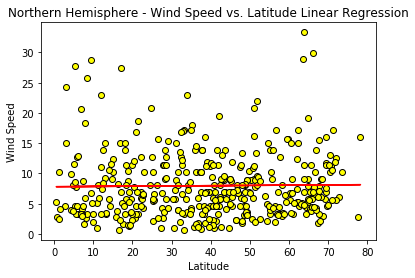

In [66]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : 0.0


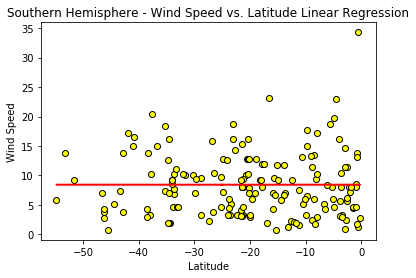

In [67]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])


# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

Based on the analysis and using Pearson's Correlation Coefficient, there is a weak correlation between Wind Speed and latitude. In fact, in the southern hemisphere, there is no correlation.